In [ ]:
pip install pandas openpyxl jupyter

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
import pandas as pd

# Cargar hoja específica del Excel
df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
# Mostrar primeras filas
df.head()

# Dimensiones
df.shape

# Tipos de datos
df.dtypes

# Valores nulos por columna
df.isnull().sum()

# Columnas únicas y su contenido básico
for col in df.columns:
    print(f"\n{col} - Valores únicos: {df[col].nunique()}")
    print(df[col].value_counts(dropna=False).head())



Invoice - Valores únicos: 25900
Invoice
573585    1114
581219     749
581492     731
580729     721
558475     705
Name: count, dtype: int64

StockCode - Valores únicos: 4070
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: count, dtype: int64

Description - Valores únicos: 4223
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: count, dtype: int64

Quantity - Valores únicos: 722
Quantity
1     148228
2      81829
12     61063
6      40868
4      38484
Name: count, dtype: int64

InvoiceDate - Valores únicos: 23260
InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
Name: count, dtype: int64

Price - Valores únicos: 1630
Price
1.25    50496
1.65    38181
0.85    28497

In [4]:
# Eliminar duplicados
df = df.drop_duplicates()

# Eliminar filas sin Customer ID (no identifican un cliente)
df = df[~df['Customer ID'].isnull()]

# Verificar registros con cantidades negativas
df[df['Quantity'] < 0]

# Asumimos que las cantidades negativas son devoluciones
# Podemos decidir si analizarlas por separado o eliminarlas
# Ejemplo: eliminarlas
df = df[df['Quantity'] > 0]

# Crear columna TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']

In [5]:
# Resumen general
df.describe()

# Moda de productos
df['Description'].mode()

# Cuartiles
df['TotalPrice'].quantile([0.25, 0.5, 0.75])

# Agrupaciones por país o cliente
df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
df.groupby("Customer ID")["TotalPrice"].sum().sort_values(ascending=False)


Customer ID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
             ...    
17956.0        12.75
16454.0         6.90
14792.0         6.20
16738.0         3.75
13256.0         0.00
Name: TotalPrice, Length: 4339, dtype: float64

In [6]:
# Mostrar cuántos valores únicos tiene cada columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} únicos")

Invoice: 18536 únicos
StockCode: 3665 únicos
Description: 3877 únicos
Quantity: 302 únicos
InvoiceDate: 17286 únicos
Price: 441 únicos
Customer ID: 4339 únicos
Country: 37 únicos
TotalPrice: 2940 únicos


<Axes: title={'center': 'Ventas por día de la semana'}, xlabel='Weekday'>

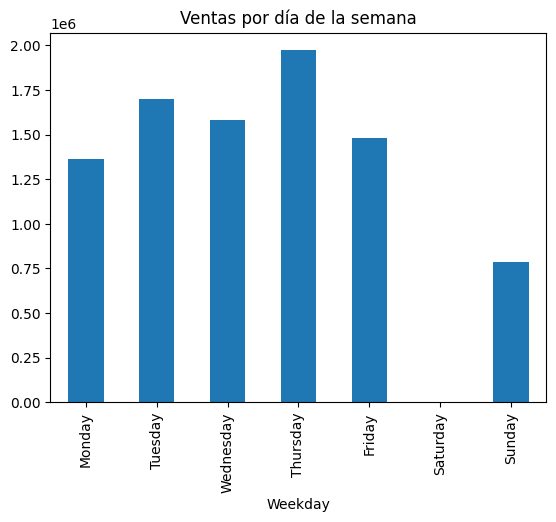

In [9]:
# Asegurar que la columna fecha es tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Crear columnas auxiliares para análisis
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Ventas mensuales
ventas_mensuales = df.groupby("InvoiceMonth")["TotalPrice"].sum()
ventas_mensuales.plot(kind='line', title="Ventas mensuales")

# Ventas por día de la semana
df['Weekday'] = df['InvoiceDate'].dt.day_name()
ventas_dia = df.groupby("Weekday")["TotalPrice"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ventas_dia.plot(kind="bar", title="Ventas por día de la semana")


In [10]:
# Top 10 clientes
df.groupby("Customer ID")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# Top 10 productos más vendidos
df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

# Productos con mayores ingresos
df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77821.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Estilo general para todos los gráficos
sns.set(style="whitegrid")  # O podés usar "darkgrid", "ticks", etc.

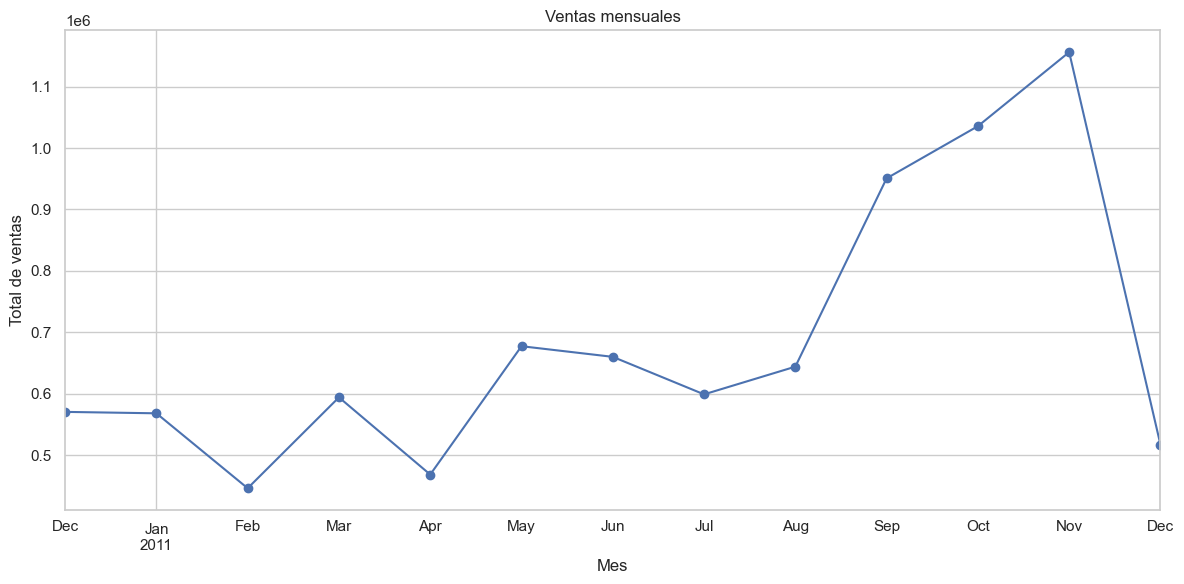

In [14]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
ventas_mensuales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
ventas_mensuales.plot(kind='line', marker='o')
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_16476\3004911349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_productos.values, y=top_productos.index, palette="Blues_d")


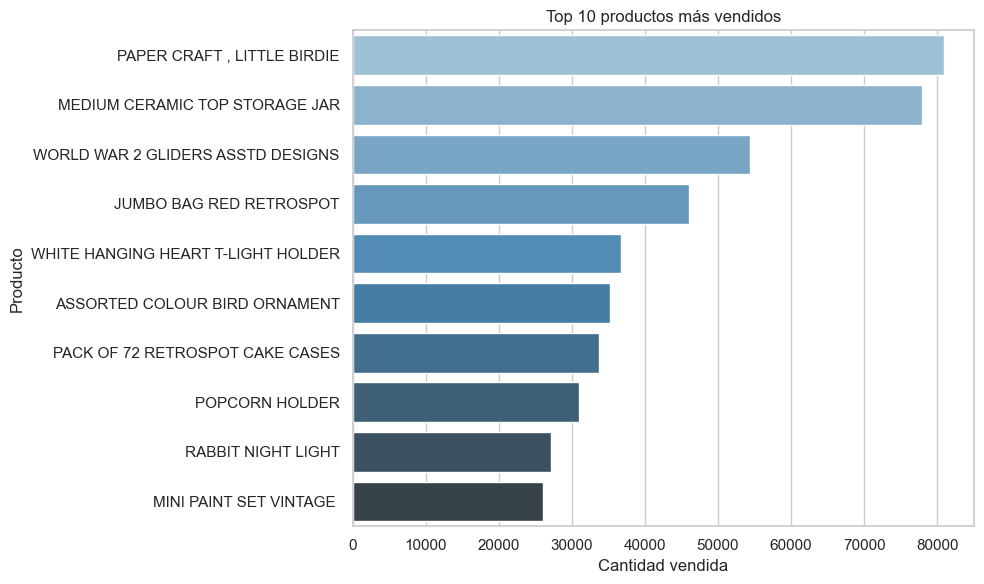

In [15]:
top_productos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_productos.values, y=top_productos.index, palette="Blues_d")
plt.title('Top 10 productos más vendidos')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_16476\4278876882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_pais.values, y=ventas_pais.index, palette="viridis")


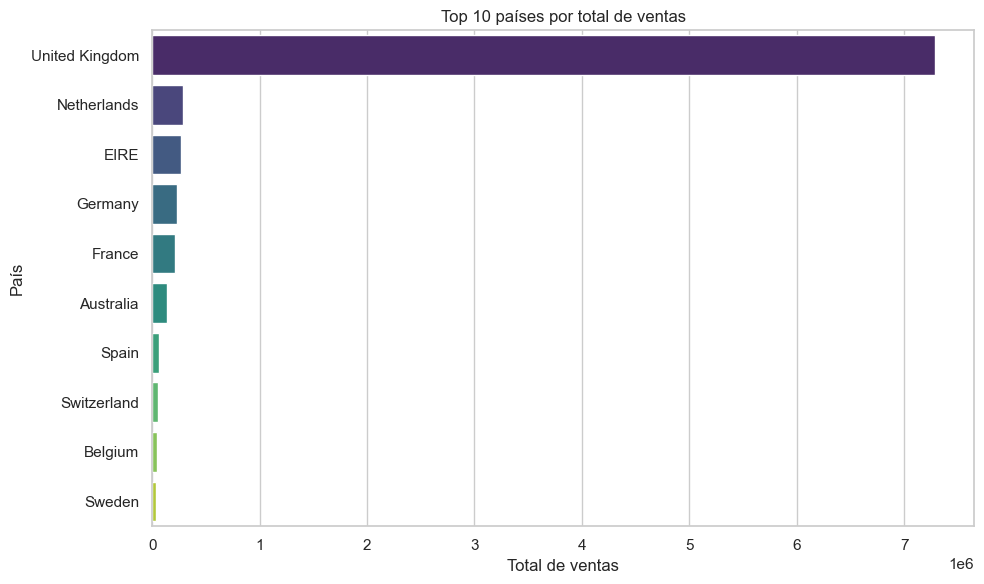

In [16]:
ventas_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_pais.values, y=ventas_pais.index, palette="viridis")
plt.title('Top 10 países por total de ventas')
plt.xlabel('Total de ventas')
plt.ylabel('País')
plt.tight_layout()
plt.show()


C:\Users\anton\AppData\Local\Temp\ipykernel_16476\142250467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clientes.values, y=top_clientes.index.astype(int), palette="crest")


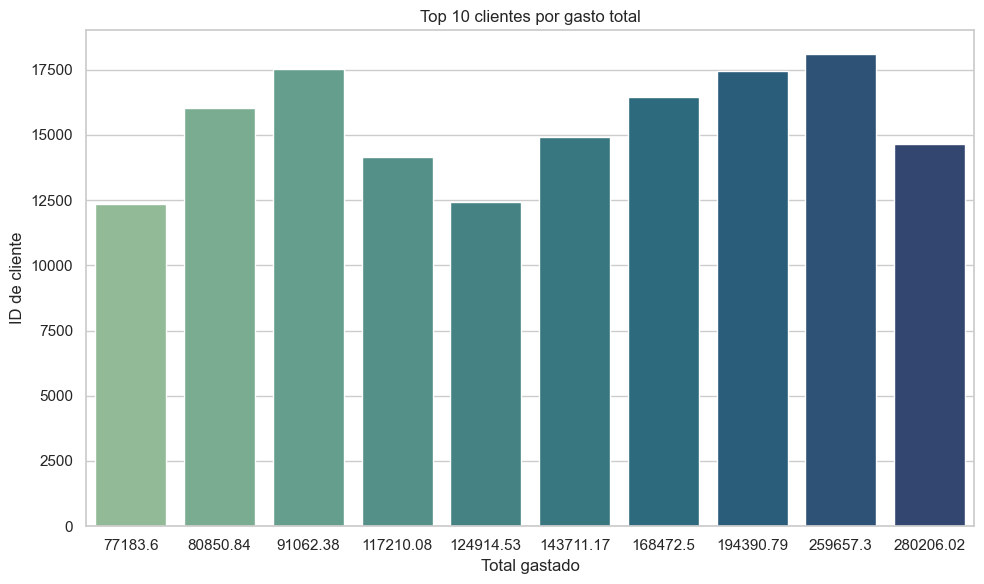

In [17]:
top_clientes = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clientes.values, y=top_clientes.index.astype(int), palette="crest")
plt.title('Top 10 clientes por gasto total')
plt.xlabel('Total gastado')
plt.ylabel('ID de cliente')
plt.tight_layout()
plt.show()
